In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
import rebound

In [3]:
def slicePlot(data, axes = None):
    if axes == None:
        gs = gridspec.GridSpec(2, 2)
        ax1 = plt.subplot(gs[1, 0])
        ax2 = plt.subplot(gs[0, 0])
        ax3 = plt.subplot(gs[1, 1])
    else:
        ax1, ax2, ax3 = axes
    
    ax1.plot(data[:, 0], data[:, 1])
    ax2.plot(data[:, 0], data[:, 2])
    ax3.plot(data[:, 2], data[:, 1])

    ax2.get_xaxis().set_visible(False)
    ax3.get_yaxis().set_visible(False)
    
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$y$')
    ax2.set_ylabel('$z$')
    ax3.set_xlabel('$z$')
    
    return (ax1, ax2, ax3)

In [4]:
class Particle(object):
    def __init__(self, simulation_particle):
        self.simulation_particle = simulation_particle
        
        self.positions = []
        self.speeds = []
        
    def savePosition(self):
        self.positions += [self.simulation_particle.xyz]
        
    def saveSpeeds(self):
        self.speeds += [self.simulation_particle.vxyz]
        
    def saveState(self):
        self.savePosition()
        self.saveSpeeds()
        
    def getPositions(self):
        if type(self.positions) is list:
            self.positions = np.array(self.positions)
        return self.positions
    
    def getSpeeds(self):
        if type(self.speeds) is list:
            self.speeds = np.array(self.speeds)
        return self.speeds

# Single step

In [5]:
sim = rebound.Simulation()
sim.add(m = 1.0)
sim.add(m = 1.0e-3, a = 0.5)
sim.integrate(1000.)
sim.status()

---------------------------------
REBOUND version:     	3.7.2
REBOUND built on:    	Jan 22 2019 12:02:21
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	1.0000000000000000e+03
Current timestep:    	0.061350
---------------------------------
<rebound.Particle object, m=1.0 x=0.0008703814588972766 y=1.4131723990746112 z=0.0 vx=0.0009468263242318041 vy=0.002463041124869792 vz=0.0>
<rebound.Particle object, m=0.001 x=-0.3703814588822417 y=1.7480933913150427 z=0.0 vx=-0.9468263242317857 vy=-1.0481206324038619 vz=0.0>
---------------------------------


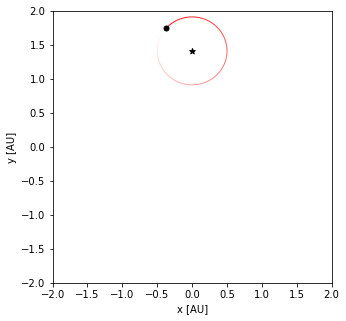

In [6]:
fig = rebound.OrbitPlot(sim, color = True, unitlabel = "[AU]", lim = 2.)

# Multiple data points

In [7]:
sim = rebound.Simulation()
sim.add(m = 1)
sim.add(m = 1.0e-3, x = 0, y = 1, z = 0, vx = 1.2)

dt = 0.1
particle = sim.particles[1]

In [8]:
n_points = 1000

times = np.zeros(n_points)
positions = np.zeros((n_points, 3))
speeds = np.zeros((n_points, 3))

In [9]:
for i in range(n_points):
    times[i] = times[i - 1] + dt
    sim.integrate(times[i], exact_finish_time = 0) # integrate to the nearest timestep so WHFast's timestep stays constant
    positions[i] = particle.xyz
    speeds[i] = particle.vxyz

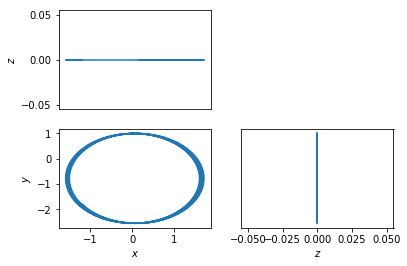

In [10]:
axes = slicePlot(positions)

# Multiple particle

In [17]:
sim = rebound.Simulation()
sim.add(m = 1)
sim.add(m = 1.0e-3, x = 0, y = 1, z = 0, vx = 1.)
sim.move_to_com() 

dt = 0.01
particle0 = Particle(sim.particles[0])
particle1 = Particle(sim.particles[1])

times = np.arange(0, 70, dt)

In [18]:
for time in times:
    sim.integrate(time, exact_finish_time = 0) # integrate to the nearest timestep so WHFast's timestep stays constant
    particle0.saveState()
    particle1.saveState()

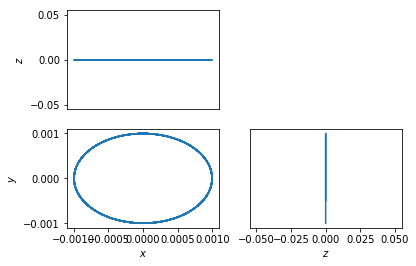

In [19]:
axes = slicePlot(particle0.getPositions())
# axes = slicePlot(particle1.getPositions(), axes)